<a href="https://colab.research.google.com/github/Viktory4121/diploma/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
from google.colab import files
import xlrd
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from collections import Counter

In [86]:
uploaded = files.upload()

Saving ConvertedTable.xlsx to ConvertedTable (1).xlsx


In [87]:
data = pd.read_excel(uploaded['ConvertedTable.xlsx'])
pdata = pd.DataFrame(data)
#Удаление лишних столбцов
pdata = pdata.drop('Отметка времени', axis=1)
pdata = pdata.drop('Учебное заведение', axis=1)
pdata = pdata.drop('Направление и профиль', axis=1)
pdata = pdata.drop('Курс', axis=1)

#Изменение формата представления пола студента
pdata['Мужской пол'] = [int(pdata['Пол'][i] == 'Мужской') for i in range(len(pdata))]
pdata = pdata.drop('Пол', axis=1)

pdata

,Возраст,Не нравится составленное расписание,Составленное расписание неудобно,Не устраивает работа профорганизаций,Не устраивает работа кафедры,Не устраивает работа деканата,Документы оформляют слишком долго,Недостаточное количество учебной литературы,Маленькие стипендии,"Мало конкурсов/турниров, где можно показать себя",...,Не успеваю сдать долги,Не хочу углубляться в учебу,Эта профессия не принесёт пользу обществу,Учёба мешает развиваться,Не хочу «бежать» за оценками,Нет мотивации,"Получаю образованию только для того, чтобы было",Близкие не одобряют выбор профессии,Приходится жить далеко от родных и близких,Мужской пол
0,20,6,6,6,8,5,5,3,3,7,...,10,10,7,8,10,8,10,2,2,1
1,20,10,10,5,0,0,0,5,4,0,...,0,2,0,0,0,0,0,1,0,0
2,20,1,1,0,0,1,0,4,10,4,...,2,10,0,10,10,10,10,4,0,1
3,20,5,5,4,4,4,4,4,5,4,...,3,5,5,5,3,5,5,0,1,0
4,20,0,0,5,0,3,4,0,7,0,...,0,5,0,4,5,0,9,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,24,0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,23,3,1,1,1,3,3,2,7,5,...,0,0,0,0,4,0,0,0,0,1
103,24,0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,24,0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
#таблица с ответами только из 2й части анкеты
x = np.array(pdata[pdata.columns[1:53]]).copy()

In [97]:
#17,18,21,28,29,32,35,37,38,39,48,50,51 - номера вопросов
#они либо значимые, либо малозначимые, выделенные в регрессионном анализе
x = x[:,[16,17,20,27,28,31,34,36,37,38,47,49,50]]

#2 cluster

In [98]:
kmeans_2 = KMeans(n_clusters=2, random_state=0)
kmeans_2.fit(x)
predict_2cl = kmeans_2.predict(x)
#print(predict_2cl)
#print(kmeans_2.cluster_centers_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [112]:
#количество людей в каждом кластере (отсчёт кластеров с 0)
Counter(predict_2cl)

Counter({0: 50, 1: 56})

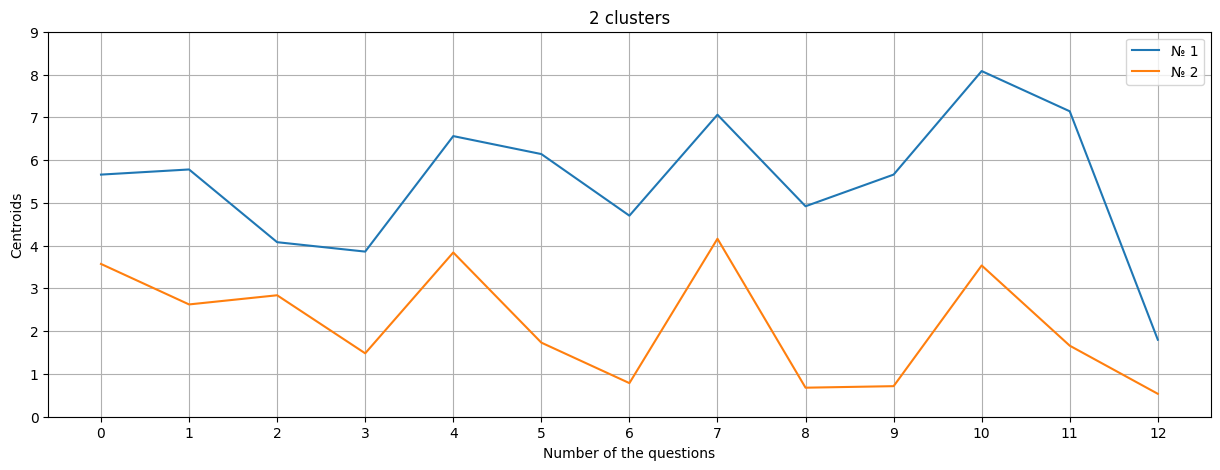

In [100]:
K = plt.figure() 
K.set_figwidth(15) 
K.set_figheight(5)

plt.plot(kmeans_2.cluster_centers_[0])
plt.plot(kmeans_2.cluster_centers_[1])

#[xmin, xmax, ymin, ymax]
#plt.axis([0, 52, 0, 9])
plt.xticks(range(len(x[0])))
plt.yticks(range(10))

plt.grid(True)
plt.title('2 clusters')
plt.xlabel('Number of the questions')
plt.ylabel('Centroids')
plt.legend(['№ 1', '№ 2'])

#3 cluster

In [101]:
kmeans_3 = KMeans(n_clusters=3, random_state=0)
kmeans_3.fit(x)
predict_3cl = kmeans_3.predict(x)
#print(predict_3cl)
#print(kmeans_3.cluster_centers_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [113]:
#количество людей в каждом кластере (отсчёт кластеров с 0)
Counter(predict_3cl)

Counter({2: 21, 0: 46, 1: 39})

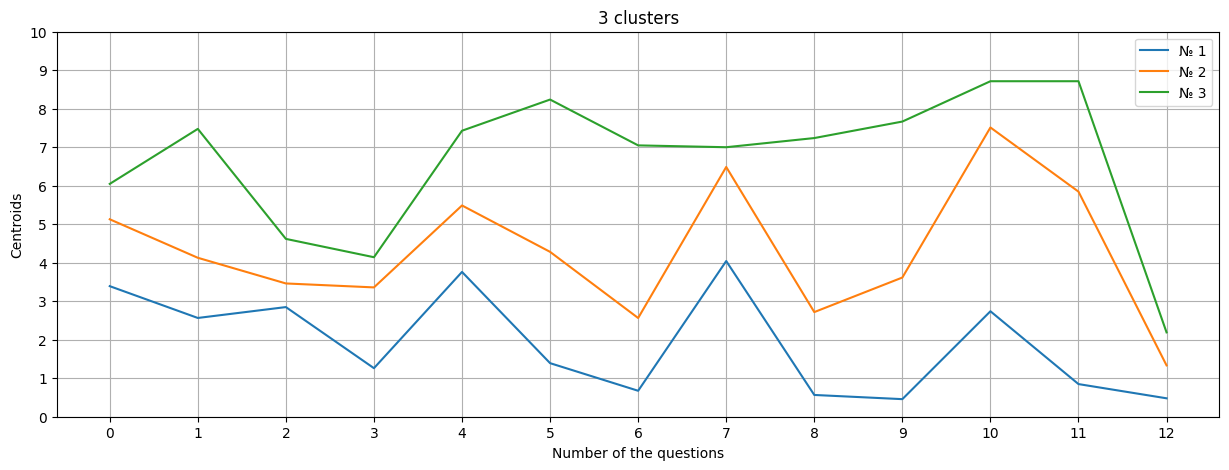

In [102]:
K = plt.figure() 
K.set_figwidth(15) 
K.set_figheight(5)

plt.plot(kmeans_3.cluster_centers_[0])
plt.plot(kmeans_3.cluster_centers_[1])
plt.plot(kmeans_3.cluster_centers_[2])

#[xmin, xmax, ymin, ymax]
#plt.axis([0, 52, 0, 10])
plt.xticks(range(len(x[0])))
plt.yticks(range(11))

plt.grid(True)
plt.title('3 clusters')
plt.xlabel('Number of the questions')
plt.ylabel('Centroids')
plt.legend(['№ 1', '№ 2', '№ 3'])

#4 cluster

In [103]:
kmeans_4 = KMeans(n_clusters=4, random_state=0)
kmeans_4.fit(x)
predict_4cl = kmeans_4.predict(x)
#print(predict_4cl)
#print(kmeans_4.cluster_centers_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [114]:
#количество людей в каждом кластере (отсчёт кластеров с 0)
Counter(predict_4cl)

Counter({2: 20, 1: 41, 0: 20, 3: 25})

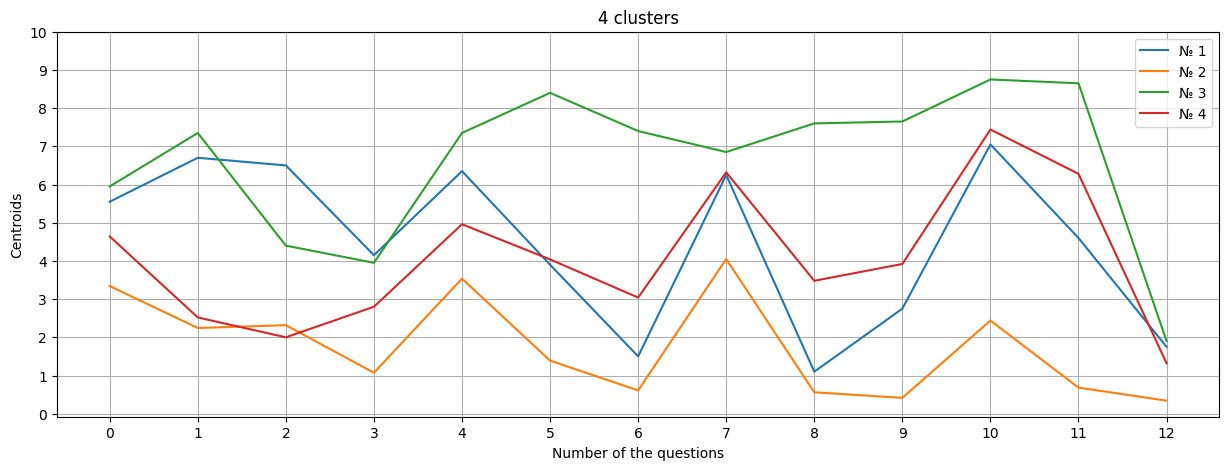

In [104]:
K = plt.figure() 
K.set_figwidth(15) 
K.set_figheight(5)

plt.plot(kmeans_4.cluster_centers_[0])
plt.plot(kmeans_4.cluster_centers_[1])
plt.plot(kmeans_4.cluster_centers_[2])
plt.plot(kmeans_4.cluster_centers_[3])

#[xmin, xmax, ymin, ymax]
#plt.axis([0, 52, 0, 10])
plt.xticks(range(len(x[0])))
plt.yticks(range(11))

plt.grid(True)
plt.title('4 clusters')
plt.xlabel('Number of the questions')
plt.ylabel('Centroids')
plt.legend(['№ 1', '№ 2', '№ 3', '№ 4'])

#5 clusters

In [105]:
kmeans_5 = KMeans(n_clusters=5, random_state=0)
kmeans_5.fit(x)
predict_5cl = kmeans_5.predict(x)
#print(predict_5cl)
#print(kmeans_5.cluster_centers_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [115]:
#количество людей в каждом кластере (отсчёт кластеров с 0)
Counter(predict_5cl)

Counter({2: 20, 4: 27, 0: 12, 3: 26, 1: 21})

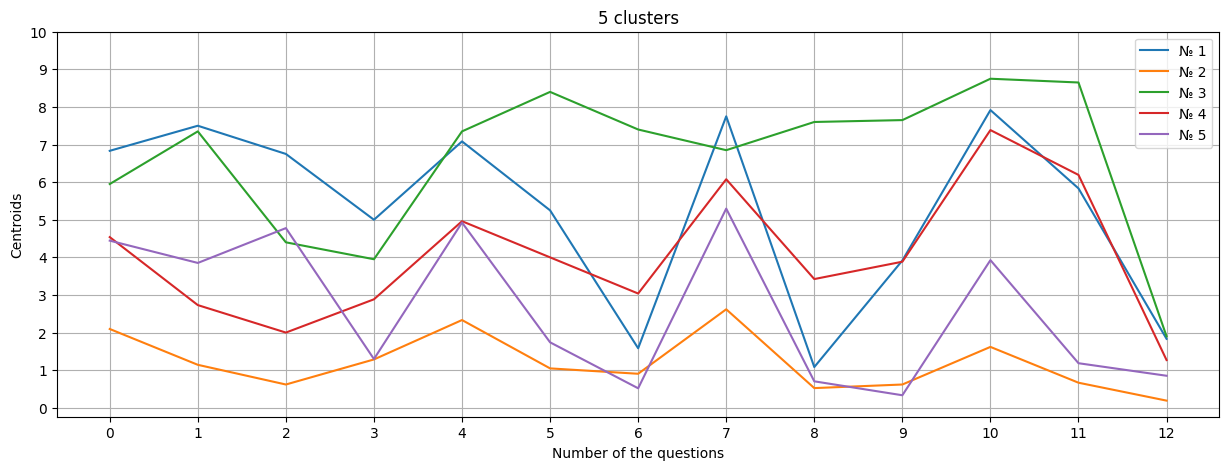

In [106]:
K = plt.figure() 
K.set_figwidth(15) 
K.set_figheight(5)

plt.plot(kmeans_5.cluster_centers_[0])
plt.plot(kmeans_5.cluster_centers_[1])
plt.plot(kmeans_5.cluster_centers_[2])
plt.plot(kmeans_5.cluster_centers_[3])
plt.plot(kmeans_5.cluster_centers_[4])

#[xmin, xmax, ymin, ymax]
#plt.axis([0, 52, 0, 10])
plt.xticks(range(len(x[0])))
plt.yticks(range(11))

plt.grid(True)
plt.title('5 clusters')
plt.xlabel('Number of the questions')
plt.ylabel('Centroids')
plt.legend(['№ 1', '№ 2', '№ 3', '№ 4', '№ 5'])

#6 clusters

In [107]:
kmeans_6 = KMeans(n_clusters=6, random_state=0)
kmeans_6.fit(x)
predict_6cl = kmeans_6.predict(x)
#print(predict_6cl)
#print(kmeans_6.cluster_centers_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [116]:
#количество людей в каждом кластере (отсчёт кластеров с 0)
Counter(predict_6cl)

Counter({2: 19, 3: 15, 4: 13, 5: 19, 1: 24, 0: 16})

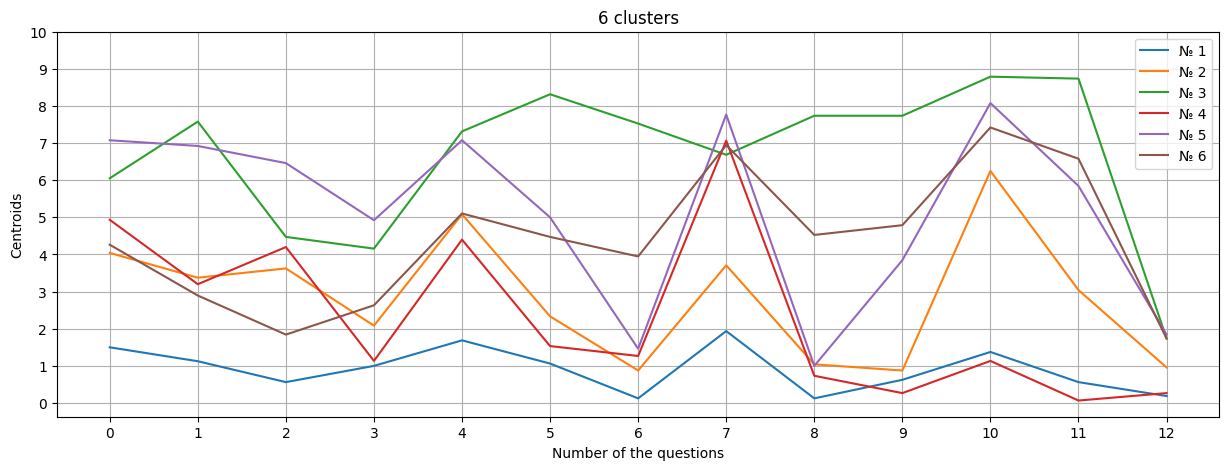

In [108]:
K = plt.figure() 
K.set_figwidth(15) 
K.set_figheight(5)

plt.plot(kmeans_6.cluster_centers_[0])
plt.plot(kmeans_6.cluster_centers_[1])
plt.plot(kmeans_6.cluster_centers_[2])
plt.plot(kmeans_6.cluster_centers_[3])
plt.plot(kmeans_6.cluster_centers_[4])
plt.plot(kmeans_6.cluster_centers_[5])

#[xmin, xmax, ymin, ymax]
#plt.axis([0, 52, -1, 11])
plt.xticks(range(len(x[0])))
plt.yticks(range(11))

plt.grid(True)
plt.title('6 clusters')
plt.xlabel('Number of the questions')
plt.ylabel('Centroids')
plt.legend(['№ 1', '№ 2', '№ 3', '№ 4', '№ 5', '№ 6'])